## Dog Breed Prediction

In [1]:
!pip install opendatasets

  Using cached opendatasets-0.1.22-py3-none-any.whl.metadata (9.2 kB)
  Using cached kaggle-1.7.4.5-py3-none-any.whl.metadata (16 kB)
Using cached opendatasets-0.1.22-py3-none-any.whl (15 kB)
Using cached kaggle-1.7.4.5-py3-none-any.whl (181 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14/14 [opendatasets] [charset-normalizer]


In [6]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from keras.utils import load_img, img_to_array
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam

In [7]:
od.download("https://www.kaggle.com/datasets/catherinehorng/dogbreedidfromcomp")

Dataset URL: https://www.kaggle.com/datasets/catherinehorng/dogbreedidfromcomp


100%|██████████| 691M/691M [00:00<00:00, 3.07GB/s]


In [13]:
labels_all = pd.read_csv("dogbreedidfromcomp/labels.csv")

In [14]:
labels_all.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [16]:
print(labels_all.shape)

(10222, 2)


In [17]:
labels_all["breed"].unique()

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound',
       'shetland_sheepdog', 'walker_hound', 'maltese_dog',
       'norfolk_terrier', 'african_hunting_dog',
       'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer',
       'doberman', 'otterhound', 'standard_schnauzer',
       'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn',
       'affenpinscher', 'labrador_retriever', 'ibizan_hound',
       'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael',
       'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier',
       'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz',
       'german_shepherd', 'greater_swiss_mountain_dog', 'basset',
       'australian_terrier', 'schipperke', 'rhodesian_ridgeback',
       'irish_setter', 'appenzeller', 'bloodhound', 'samoyed',
       'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon',
       'borde

In [18]:
breed_all = labels_all["breed"]
breed_all =breed_all.value_counts()
breed_all

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

In [20]:
class_names = ["rhodesian_ridgeback", "shih-tzu" ,"eskimo_dog"]
labels = labels_all[(labels_all["breed"].isin(class_names))]
labels

,id,breed
57,0162b3e0144fb1d1ab82fbff3ace9938,shih-tzu
65,019ff93e03802e661577b5869e099dcb,rhodesian_ridgeback
100,025d903b457b865fd29424916e42fbc2,rhodesian_ridgeback
109,029ed6af5dcadfd105db9271e12ede14,rhodesian_ridgeback
128,0310a425f26d797634aadeb66bd63ef1,rhodesian_ridgeback
...,...,...
9963,fa289147f856e2525ee70529a6d0ac52,rhodesian_ridgeback
10018,fb542f35faf7843778cb2c35d81a7a44,eskimo_dog
10020,fb5898e240410c7d736548bf938bbc0a,shih-tzu
10051,fbf881c1bd9b236af37efdfeb4a1fb51,rhodesian_ridgeback


In [23]:
X_data = np.zeros((len(labels), 224,224,3), dtype = "float32")
Y_data = label_binarize(labels["breed"], classes = class_names)

In [32]:
for i in tqdm (range(len(labels))):
    img =load_img(f"dogbreedidfromcomp/train/{labels.iloc[i]['id']}.jpg",
                  target_size = [224,224])
    img = img_to_array(img)
    x = np.expand_dims(img.copy(), axis=0)
    X_data[i] = x/255.0

100%|██████████| 266/266 [00:01<00:00, 248.42it/s]


In [33]:
print(X_data.shape)
print(Y_data.shape)

(266, 224, 224, 3)
(266, 3)


In [40]:
from keras.regularizers import l2

In [41]:
model = Sequential()

model. add(Conv2D(filters = 64,
                  kernel_size=(5,5),
                  activation="relu",
                  input_shape=(224,224,3)))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 32,
                 kernel_size=(3,3),
                 activation="relu",
                 kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 16,
                 kernel_size=(7,7),
                 activation="relu",
                 kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 8,
                 kernel_size=(5,5),
                 activation="relu",
                 kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation ="relu", kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation ="relu", kernel_regularizer=l2(0.01)))
model.add(Dense(len(class_names), activation="softmax"))

model.compile(loss="categorical_crossentropy",
              optimizer = Adam(0.0001),
              metrics = ["accuracy"])

model.summary()



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 64)   │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 108, 108, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 48, 48, 16)     │        25,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 20, 20, 8)      │         3,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 10, 10, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,619 (635.23 KB)

 Trainable params: 162,619 (635.23 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
class_names

['rhodesian_ridgeback', 'shih-tzu', 'eskimo_dog']

In [43]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X_data,
                                                            Y_data,
                                                            test_size=0.2)
X_train, X_val, Y_train, Y_val =train_test_split(X_train_val,
                                                 Y_train_val,
                                                 test_size=0.25)

In [44]:
epochs = 60
batch_size= 64

history = model.fit(X_train,Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val,Y_val))

Epoch 1/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 852ms/step - accuracy: 0.3208 - loss: 4.9167 - val_accuracy: 0.2642 - val_loss: 4.8887
Epoch 2/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 729ms/step - accuracy: 0.3711 - loss: 4.8752 - val_accuracy: 0.2642 - val_loss: 4.8532
Epoch 3/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 729ms/step - accuracy: 0.4088 - loss: 4.8363 - val_accuracy: 0.3962 - val_loss: 4.8103
Epoch 4/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 740ms/step - accuracy: 0.4528 - loss: 4.7996 - val_accuracy: 0.5283 - val_loss: 4.7700
Epoch 5/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 715ms/step - accuracy: 0.4403 - loss: 4.7626 - val_accuracy: 0.5094 - val_loss: 4.7337
Epoch 6/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 728ms/step - accuracy: 0.4403 - loss: 4.7274 - val_accuracy: 0.4906 - val_loss: 4.6978
Epoch 7/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 740ms/step - accuracy: 0.4151 - loss: 4.6936 - val_accuracy: 0.4906 - val_loss: 4.6637
Epoch 8/60
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 792ms/step - accuracy: 0.4340 - loss: 4.6580 - val_accuracy: 0.5283 - val_loss:

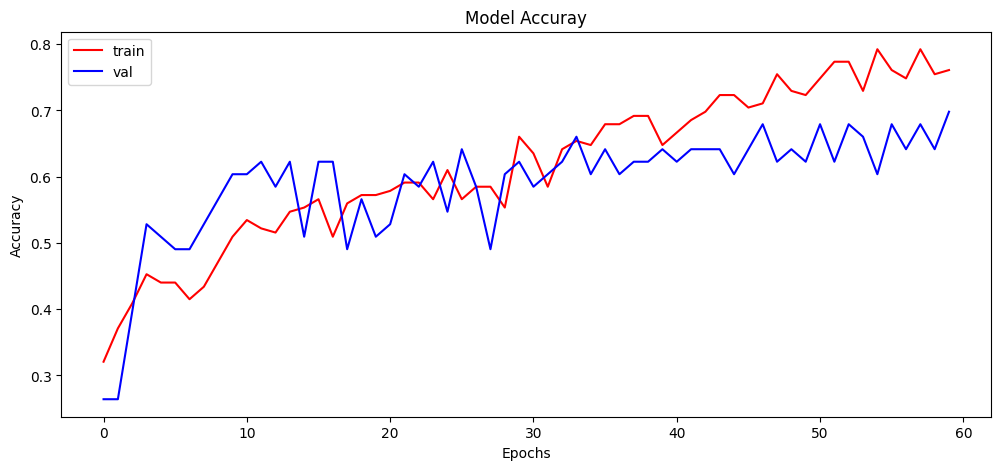

In [46]:
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], color= 'r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title("Model Accuray")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "val"])

plt.show()

In [47]:
Ypred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print("Accuracy over the test set: \n", round((score[1]*100),2), "%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.6852 - loss: 3.3636
Accuracy over the test set: 
 68.52 %


In [49]:
model.save("dog_breed.keras")